In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fifa = pd.read_csv("Data/fifa_data_downloaded-KG.csv")

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

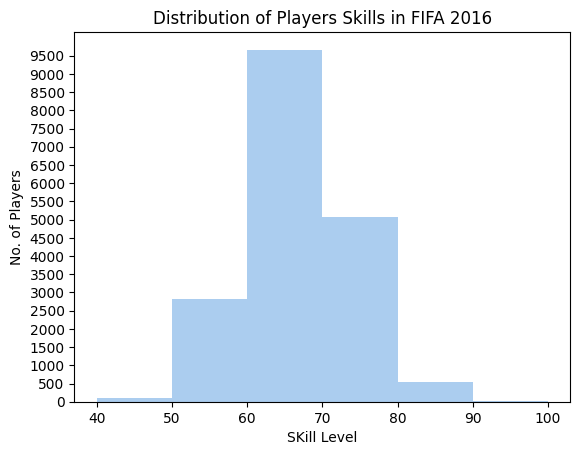

In [4]:
bins = np.arange(40, 101, 10)
ybins = np.arange(0,10000, 500)

# plt.figure(figsize = (8,5), dpi=300)
plt.hist(fifa.Overall, bins=bins, color="#abcdef")

plt.yticks()
plt.xticks(bins)
plt.yticks(ybins)

plt.xlabel("SKill Level")
plt.ylabel("No. of Players")
plt.title("Distribution of Players Skills in FIFA 2016")
plt.show()

Pie Chart 

C:\Users\DELL\AppData\Local\Temp\ipykernel_10964\468162504.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0] #gives an array so [0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_10964\468162504.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


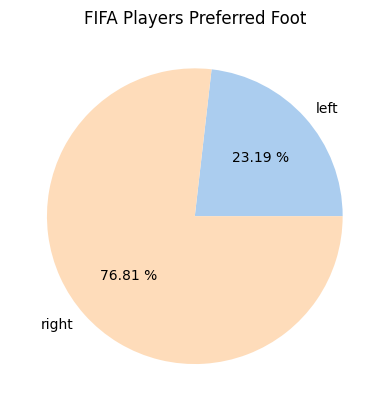

In [5]:
# left = fifa.loc[fifa['Preferred Foot'] == 'Left']
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0] #gives an array so [0]
# left[['Name','Preferred Foot']]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
# left

# plt.pie(fifa['Preferred Foot']) # ERR ValueError: could not convert string to float: 'Left', we have to pass numbers
plt.pie([left,right], labels=['left','right'], colors=['#abcdef', "#fedcba"], autopct="%.2f %%") # %%, % is escape character
plt.title("FIFA Players Preferred Foot")

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10964\2579446558.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light = fifa.loc[fifa.Weight < 125].count()[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_10964\2579446558.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_10964\2579446558.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

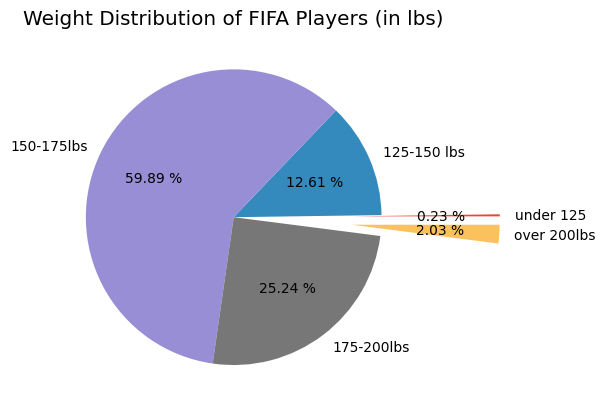

In [6]:
fifa["Weight"]

# 159lbs weights is in this format, gonna be a problem 🧏‍♀️

# plt.pie(fifa['Weight']) # ERR ValueError: could not convert string to float: '159lbs'

# weights = fifa['Weight'].str.split("l")
fifa.Weight = [x.strip("lbs") if type(x) == str else x for x in fifa.Weight]

fifa.Weight = [float(x) for x in fifa.Weight]  # idk why it was string
# print(type(fifa.Weight[0])) #string

# INFO
# plt.style.use("default")
plt.style.use("ggplot")

# categories
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 200)].count()[0]

# variables
weights = [light, light_medium, medium, medium_heavy, heavy]  # list of weights
labels = ["under 125", "125-150 lbs", "150-175lbs", "175-200lbs", "over 200lbs"]
explode = [0.8, 0, 0, 0, 0.8]

plt.title("Weight Distribution of FIFA Players (in lbs)")
# plotting
plt.pie(weights, labels=labels, autopct="%.2f %%", pctdistance=0.6, explode=explode)

plt.show()

### Box and Whiskers Chart

In [27]:
barcelona = fifa.loc[fifa["Club"] == "FC Barcelona"]["Overall"]
madrid = fifa.loc[fifa.Club == "Real Madrid"]["Overall"]
nevs = fifa.loc[fifa.Club == "New England Revolution"]["Overall"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_10964\1792988177.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxes = plt.boxplot(


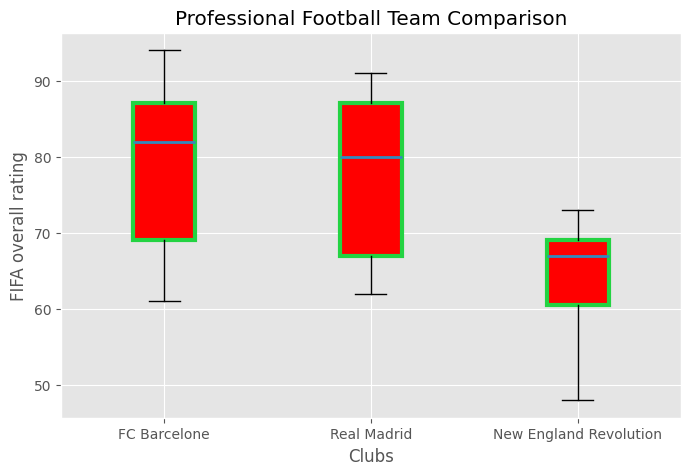

In [ ]:
# plt.style.use("ggplot")
labels = ["FC Barcelone", "Real Madrid", "New England Revolution"]

plt.figure(figsize=(8, 5))

boxes = plt.boxplot(
    [barcelona, madrid, nevs],
    labels=labels,
    patch_artist=True,
    medianprops={"linewidth": 2},
)  # tip assigning to a var to style individually
#medianprops is also designable, gotta pass the dictionary
plt.title("Professional Football Team Comparison")

plt.ylabel("FIFA overall rating")
plt.xlabel("Clubs")


for box in boxes["boxes"]: #NOTE - plt.boxplot() returns a dictionary with keys like: whiskers, caps, boxes, medians, fliers

    # set edge color
    box.set(color="#23d342", linewidth=3)
    # fill color
    box.set(
        facecolor="red"
    )  # not recognizing the facecolor, need to set *NOTE patch_artist property to True in .boxplot

plt.show()